In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

## Statistical Analysis
from scipy import stats
from scipy.stats import norm,skew

# Display all Columns
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the train and test data.
train = pd.read_csv('/content/drive/MyDrive/genesight data/Genetic-Disorder-Prediction-main/Genetic-Disorder-Prediction-main/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/genesight data/Genetic-Disorder-Prediction-main/Genetic-Disorder-Prediction-main/dataset/test.csv')

In [ ]:
# Viewing the train dataset
train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,NaN,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [ ]:
print("Dimensionality of the train dataset: ", train.shape)

Dimensionality of the train dataset:  (22083, 45)


In [ ]:
train.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Information of the train Dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

<Axes: >

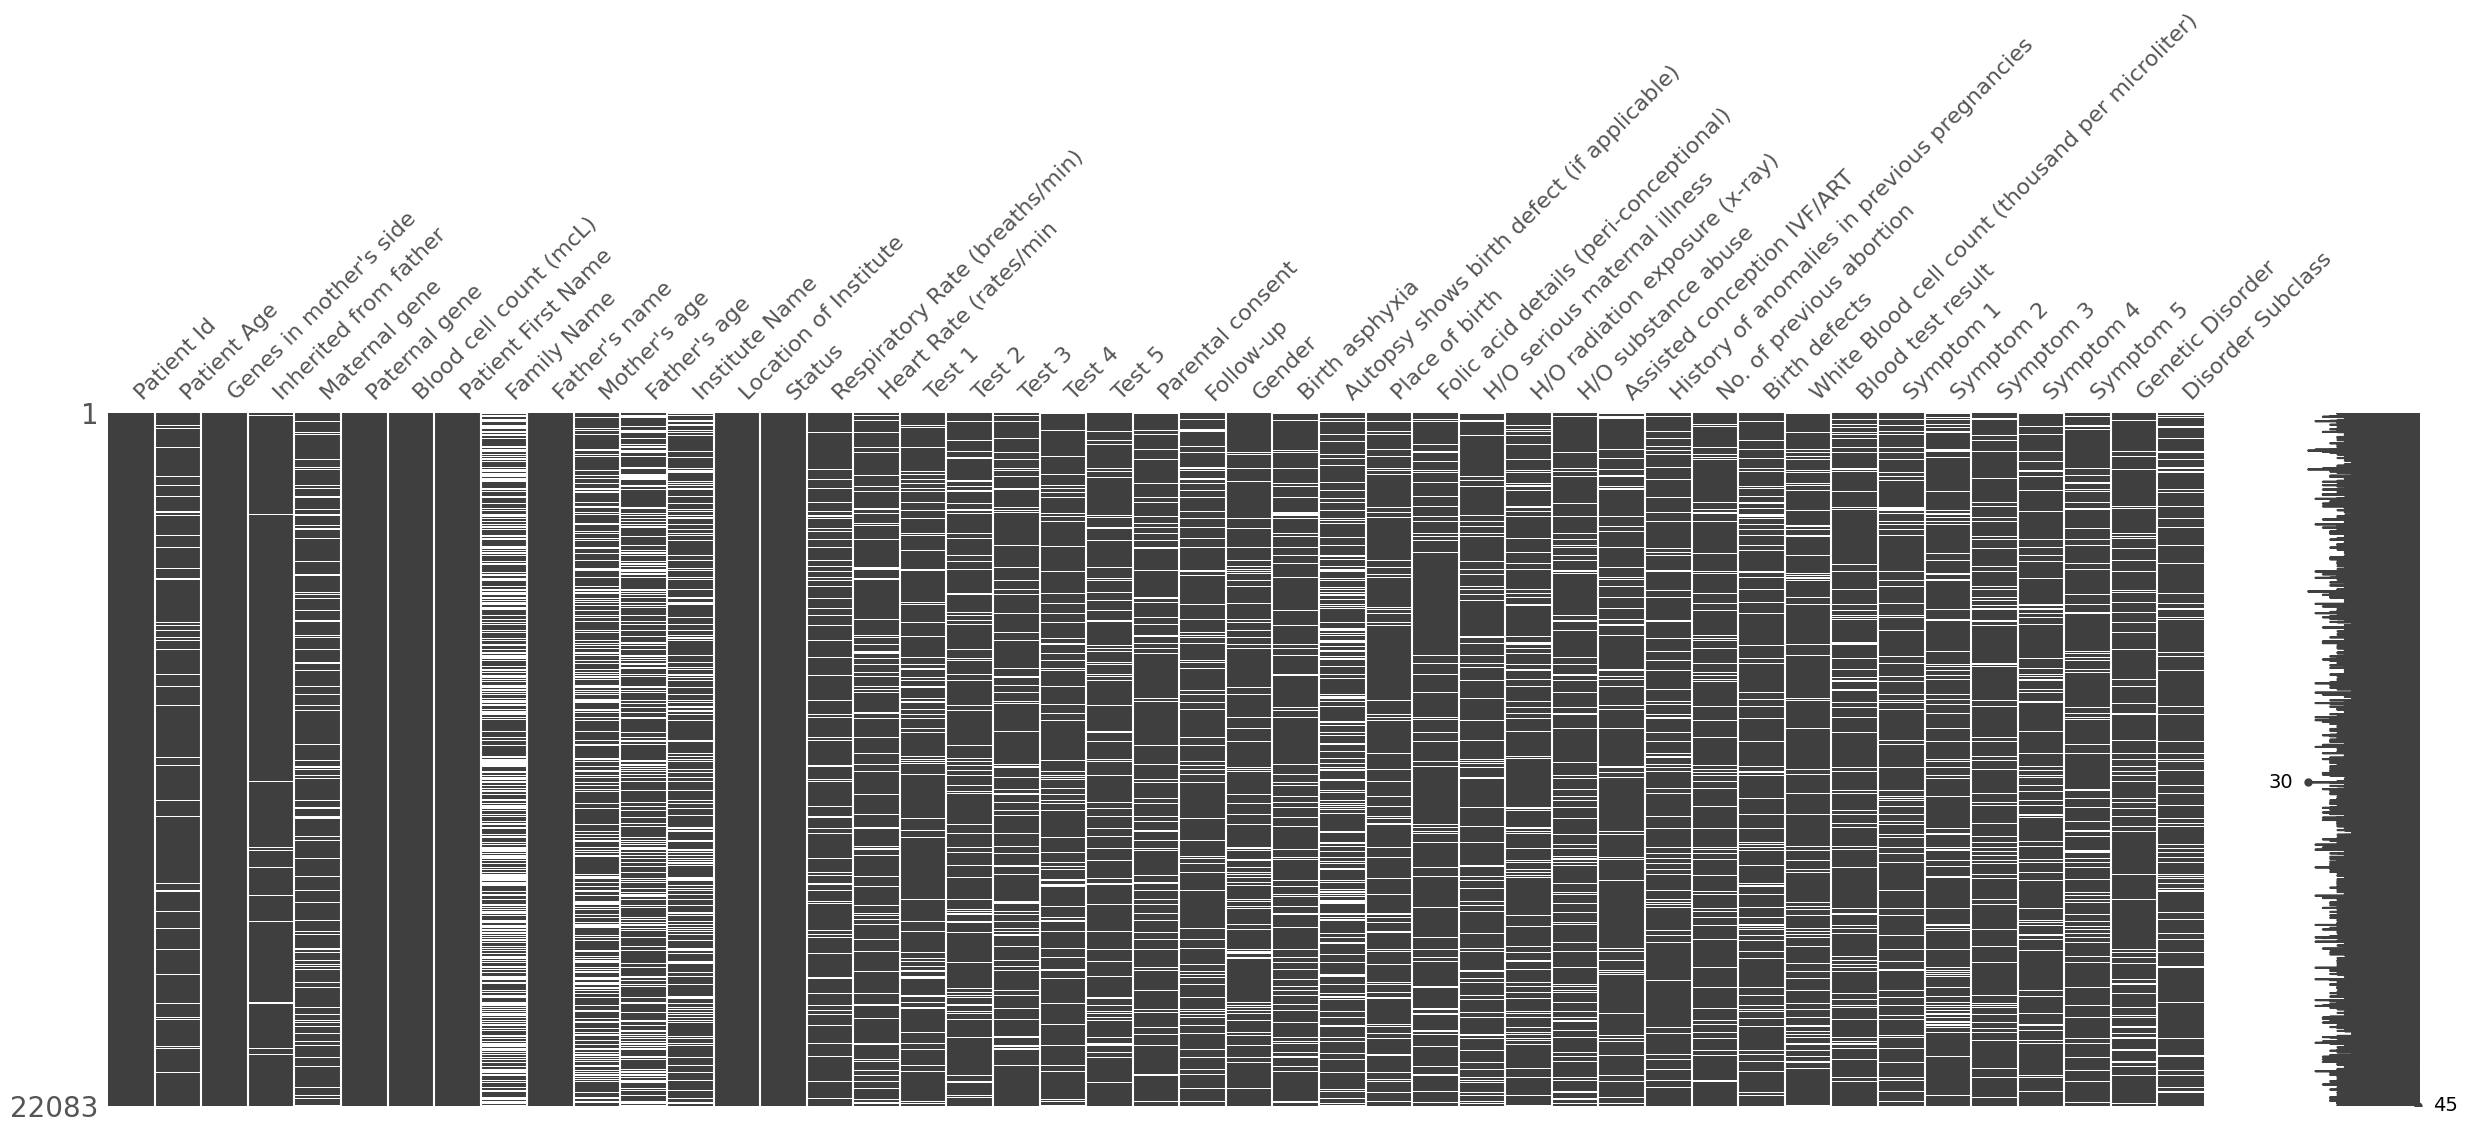

In [ ]:
# To plot a graphic of missing values
missingno.matrix(train,figsize=(30,9))

In [ ]:
# Understanding more about the missing value columns

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1)

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataset has 45 columns and 22083 observations.

 There are 37 columns that have missing values.


,Missing Values,% of Total Values
Family Name,9691,43.9
Mother's age,6036,27.3
Father's age,5986,27.1
Institute Name,5106,23.1
Autopsy shows birth defect (if applicable),4392,19.9
Maternal gene,2810,12.7
Symptom 2,2222,10.1
H/O substance abuse,2195,9.9
Gender,2173,9.8
History of anomalies in previous pregnancies,2172,9.8


In [ ]:
# Datatypes in the dataset
train.dtypes

,0
Patient Id,object
Patient Age,float64
Genes in mother's side,object
Inherited from father,object
Maternal gene,object
Paternal gene,object
Blood cell count (mcL),float64
Patient First Name,object
Family Name,object
Father's name,object


In [ ]:
train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,NaN,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [ ]:
## Checking For Duplicates
train['Patient Id'].duplicated().any()

False

In [ ]:
## Basic Statistics
train['Patient Age'].describe()

,Patient Age
count,20656.000000
mean,6.974148
std,4.319475
min,0.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,14.000000


In [ ]:
## Missing Values
train['Patient Age'].isnull().any()

True

In [ ]:
## Unique Categories
train["Genes in mother's side"].unique()

array(['Yes', 'No'], dtype=object)

Genes in mother's side
Yes    13143
No      8940
Name: count, dtype: int64


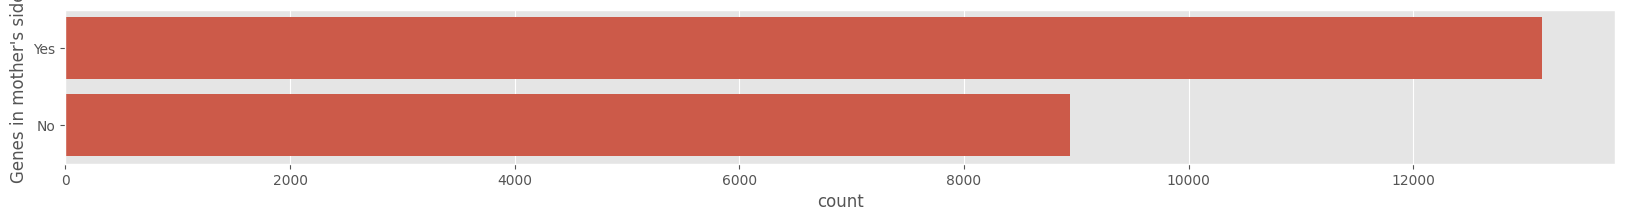

In [ ]:
# Is there any Gene Defect in the Mother?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Genes in mother's side",data= train)
#sns.countplot(x= "Genes in mother's side",data= train)             --> You can use this to get a vertical graph.

print(train["Genes in mother's side"].value_counts())             ##This will help us see the exact number along with the graph.

In [ ]:
## Unique Categories
train["Inherited from father"].unique()

array(['No', 'Yes', nan], dtype=object)

Inherited from father
No     13133
Yes     8644
Name: count, dtype: int64


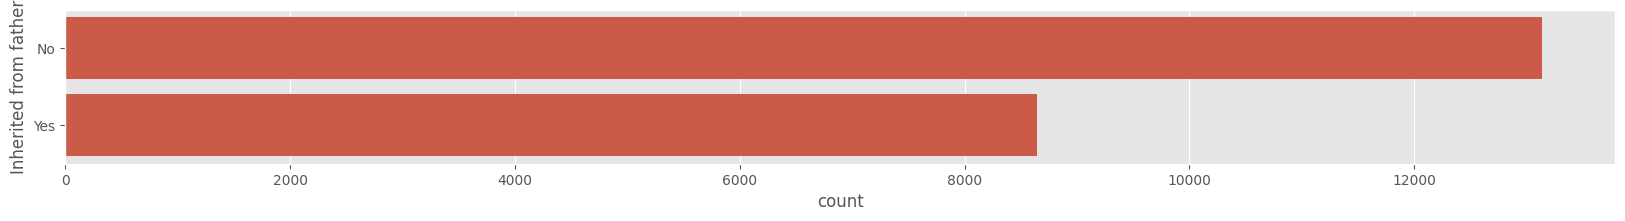

In [ ]:
# Is there any Gene Defect in the Father?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Inherited from father",data= train)

print(train["Inherited from father"].value_counts())

In [ ]:
## Unique Categories
train["Maternal gene"].unique()

array(['Yes', 'No', nan], dtype=object)

Maternal gene
Yes    10647
No      8626
Name: count, dtype: int64


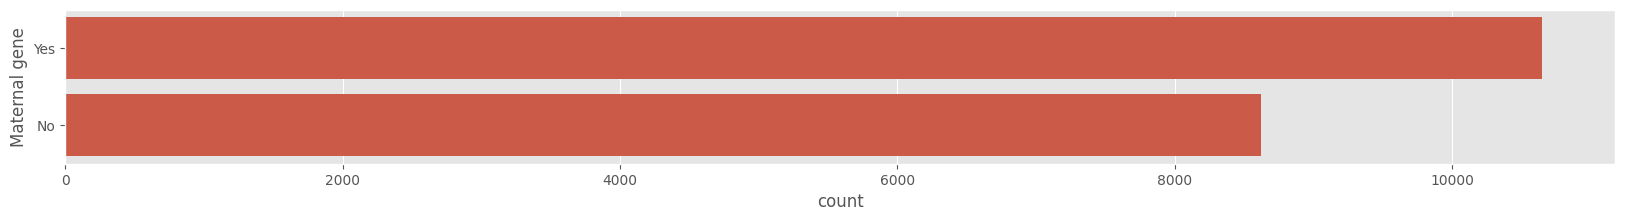

In [ ]:
# Is there any Gene Defect in the Mothers Side?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Maternal gene",data= train)

print(train["Maternal gene"].value_counts())

In [ ]:
## Unique Categories
train["Paternal gene"].unique()

array(['No', 'Yes'], dtype=object)

Paternal gene
No     12508
Yes     9575
Name: count, dtype: int64


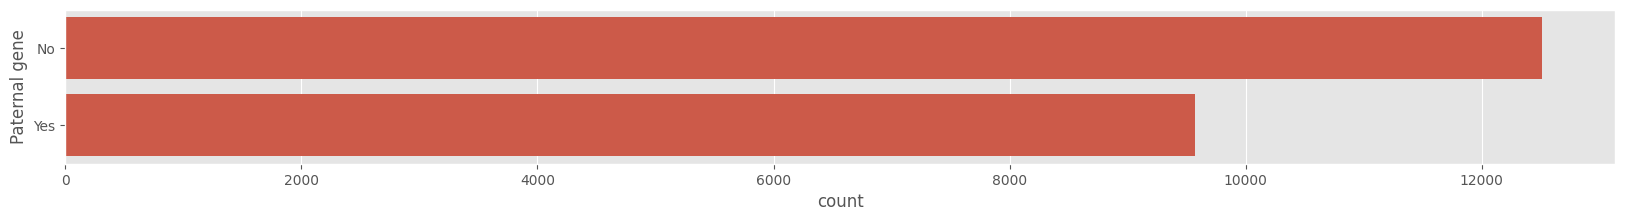

In [ ]:
# Is there any Gene Defect in the Fathers Side?
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Paternal gene",data= train)

print(train["Paternal gene"].value_counts())

In [ ]:
## Basic Statistics
train['Blood cell count (mcL)'].describe()

,Blood cell count (mcL)
count,22083.000000
mean,4.898871
std,0.199663
min,4.092727
25%,4.763109
50%,4.899399
75%,5.033830
max,5.609829


In [ ]:
## Missing Values
train['Blood cell count (mcL)'].isnull().any()

False

<Axes: xlabel='Blood cell count (mcL)', ylabel='Density'>

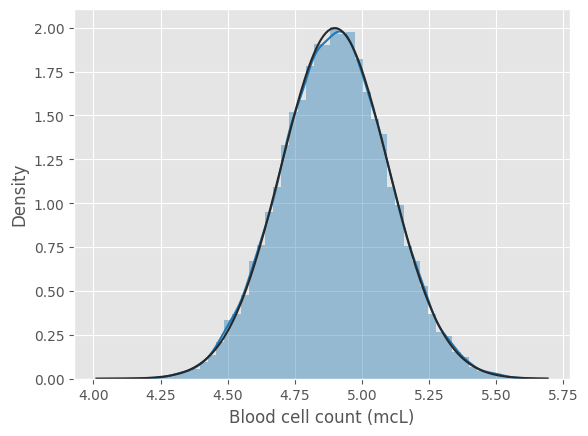

In [ ]:
## Distribution of the Feature
sns.distplot(train['Blood cell count (mcL)'], fit= norm, color= 'tab:blue')

<Axes: xlabel='Blood cell count (mcL)'>

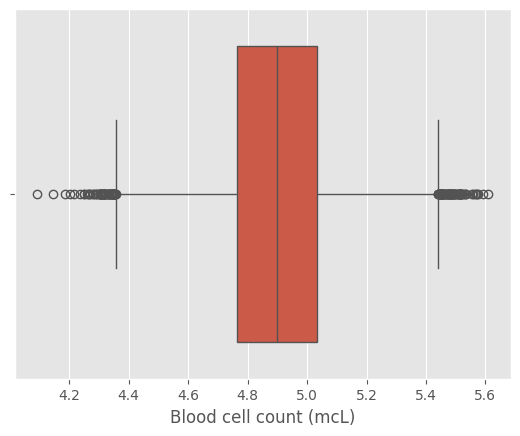

In [ ]:
## Checking For Outliers
sns.boxplot(x= train['Blood cell count (mcL)'])

In [ ]:
## Missing Values
train["Mother's age"].isnull().any()

True

In [ ]:
## Basic Statistics
train["Mother's age"].describe()

,Mother's age
count,16047.000000
mean,34.526454
std,9.852598
min,18.000000
25%,26.000000
50%,35.000000
75%,43.000000
max,51.000000


In [ ]:
## Missing Values
train["Father's age"].isnull().any()

True

In [ ]:
## Basic Statistics
train["Father's age"].describe()

,Father's age
count,16097.000000
mean,41.972852
std,13.035501
min,20.000000
25%,31.000000
50%,42.000000
75%,53.000000
max,64.000000


In [ ]:
## Unique Categories
train["Status"].unique()

array(['Alive', 'Deceased'], dtype=object)

Status
Alive       11083
Deceased    11000
Name: count, dtype: int64


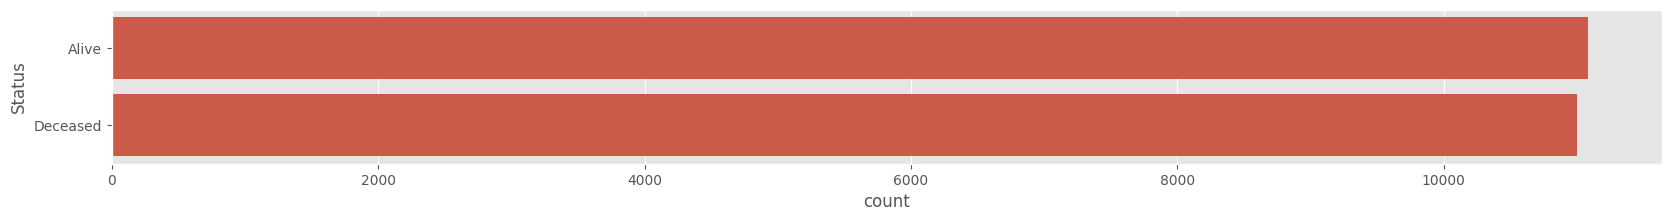

In [ ]:
# Understanding the Status of Patients
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Status",data= train)

print(train["Status"].value_counts())

In [ ]:
## Unique Categories
train["Respiratory Rate (breaths/min)"].unique()

array(['Normal (30-60)', 'Tachypnea', nan], dtype=object)

Respiratory Rate (breaths/min)
Normal (30-60)    10065
Tachypnea          9869
Name: count, dtype: int64


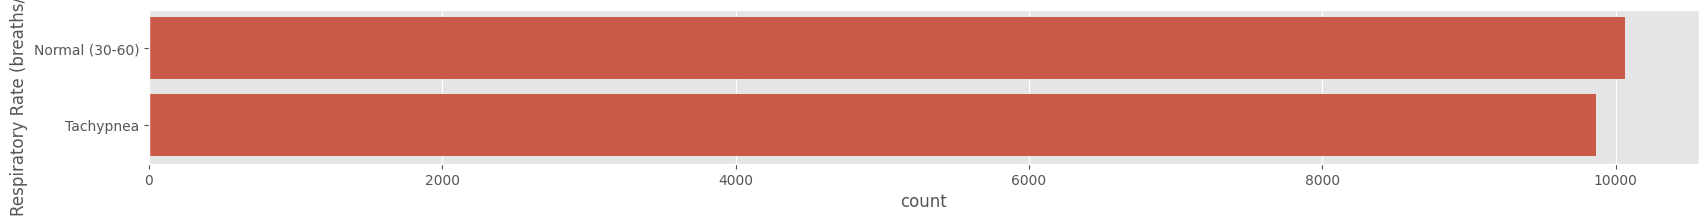

In [ ]:
# Understanding the Respiratory Rate of Patients
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Respiratory Rate (breaths/min)",data= train)

print(train["Respiratory Rate (breaths/min)"].value_counts())

In [ ]:
## Unique Categories
train["Heart Rate (rates/min"].unique()

array(['Normal', 'Tachycardia', nan], dtype=object)

Heart Rate (rates/min
Normal         10187
Tachycardia     9783
Name: count, dtype: int64


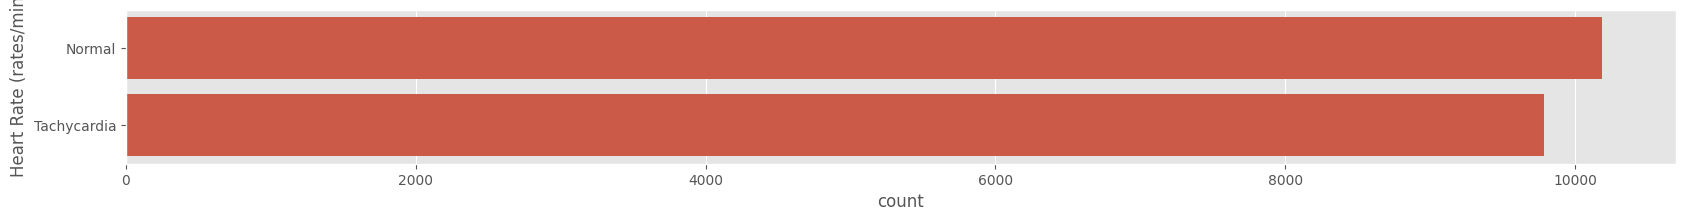

In [ ]:
# Understanding the Heart Rate of Patients
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Heart Rate (rates/min",data= train)

print(train["Heart Rate (rates/min"].value_counts())

In [ ]:
print(f"Uniqueness for Test 1 is: {train['Test 1'].unique()}")
print()
print(f"Uniqueness for Test 2 is: {train['Test 2'].unique()}")
print()
print(f"Uniqueness for Test 3 is: {train['Test 3'].unique()}")
print()
print(f"Uniqueness for Test 4 is: {train['Test 4'].unique()}")
print()
print(f"Uniqueness for Test 5 is: {train['Test 5'].unique()}")

Uniqueness for Test 1 is: [ 0. nan]

Uniqueness for Test 2 is: [nan  0.]

Uniqueness for Test 3 is: [nan  0.]

Uniqueness for Test 4 is: [ 1. nan]

Uniqueness for Test 5 is: [ 0. nan]


In [ ]:
print(f"Count for Test 1 is: {train['Test 1'].value_counts()}")
print()
print(f"Count for Test 2 is: {train['Test 2'].value_counts()}")
print()
print(f"Count for Test 3 is: {train['Test 3'].value_counts()}")
print()
print(f"Count for Test 4 is: {train['Test 4'].value_counts()}")
print()
print(f"Count for Test 5 is: {train['Test 5'].value_counts()}")

Count for Test 1 is: Test 1
0.0    19956
Name: count, dtype: int64

Count for Test 2 is: Test 2
0.0    19931
Name: count, dtype: int64

Count for Test 3 is: Test 3
0.0    19936
Name: count, dtype: int64

Count for Test 4 is: Test 4
1.0    19943
Name: count, dtype: int64

Count for Test 5 is: Test 5
0.0    19913
Name: count, dtype: int64


In [ ]:
## Unique Categories
train["Parental consent"].unique()

array(['Yes', nan], dtype=object)

In [ ]:
## Count of Categories
train["Parental consent"].value_counts()

,count
Parental consent,
Yes,19958


In [ ]:
## Unique Categories
train["Follow-up"].unique()

array(['High', 'Low', nan], dtype=object)

Follow-up
Low     10040
High     9877
Name: count, dtype: int64


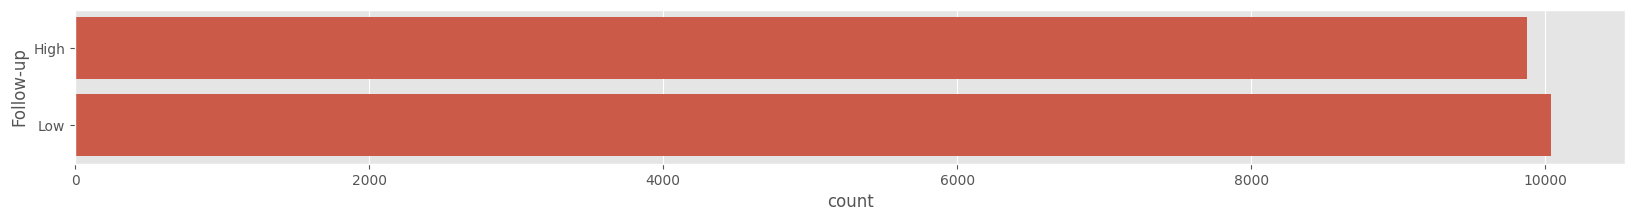

In [ ]:
# Understanding the Risk Cases
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Follow-up",data= train)

print(train["Follow-up"].value_counts())

In [ ]:
## Unique Categories
train["Gender"].unique()

array([nan, 'Male', 'Female', 'Ambiguous'], dtype=object)

Gender
Ambiguous    6695
Male         6666
Female       6549
Name: count, dtype: int64


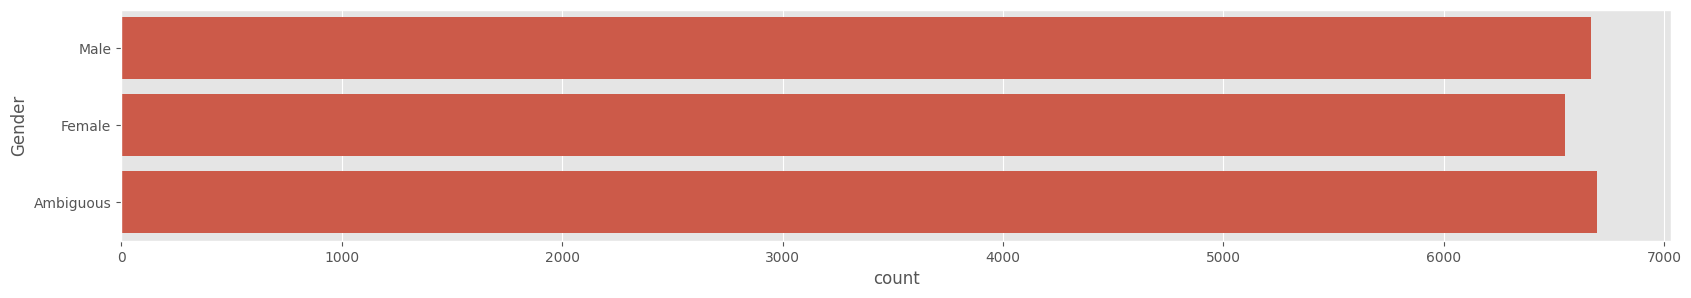

In [ ]:
# Understanding the Gender distribution
fig = plt.figure(figsize=(20,3))
sns.countplot(y= "Gender",data= train)

print(train["Gender"].value_counts())

In [ ]:
## Unique Categories
train["Birth asphyxia"].unique()

array([nan, 'No', 'No record', 'Not available', 'Yes'], dtype=object)

Birth asphyxia
Yes              5106
No record        5008
Not available    4986
No               4844
Name: count, dtype: int64


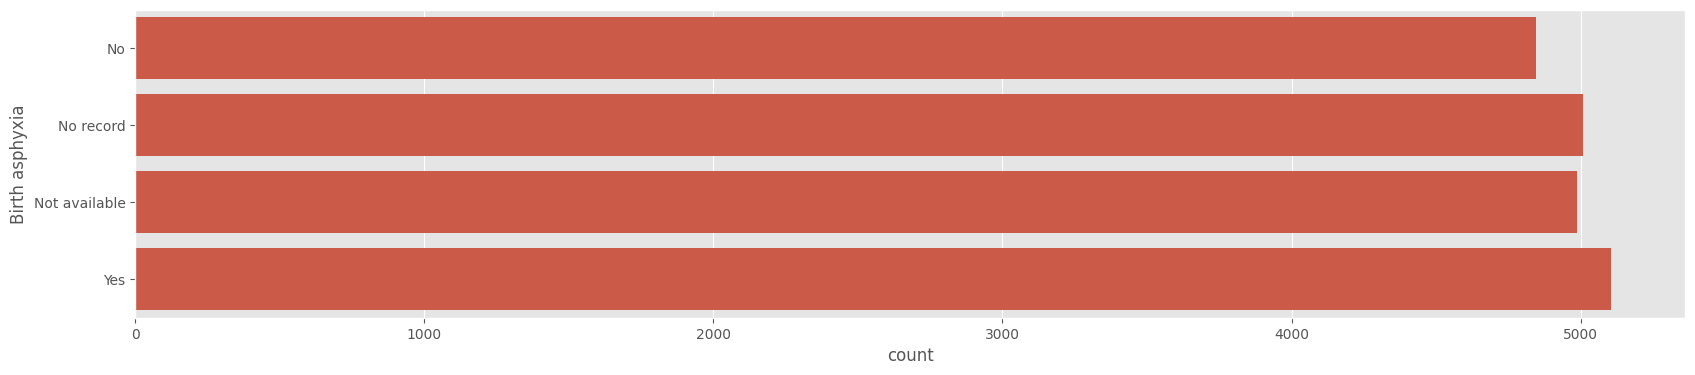

In [ ]:
# Understanding Birth asphyxia distribution
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Birth asphyxia",data= train)

print(train["Birth asphyxia"].value_counts())

In [ ]:
## Unique Categories
train["Autopsy shows birth defect (if applicable)"].unique()

array(['Not applicable', nan, 'No', 'Yes'], dtype=object)

Autopsy shows birth defect (if applicable)
Not applicable    11083
Yes                3383
No                 3225
Name: count, dtype: int64


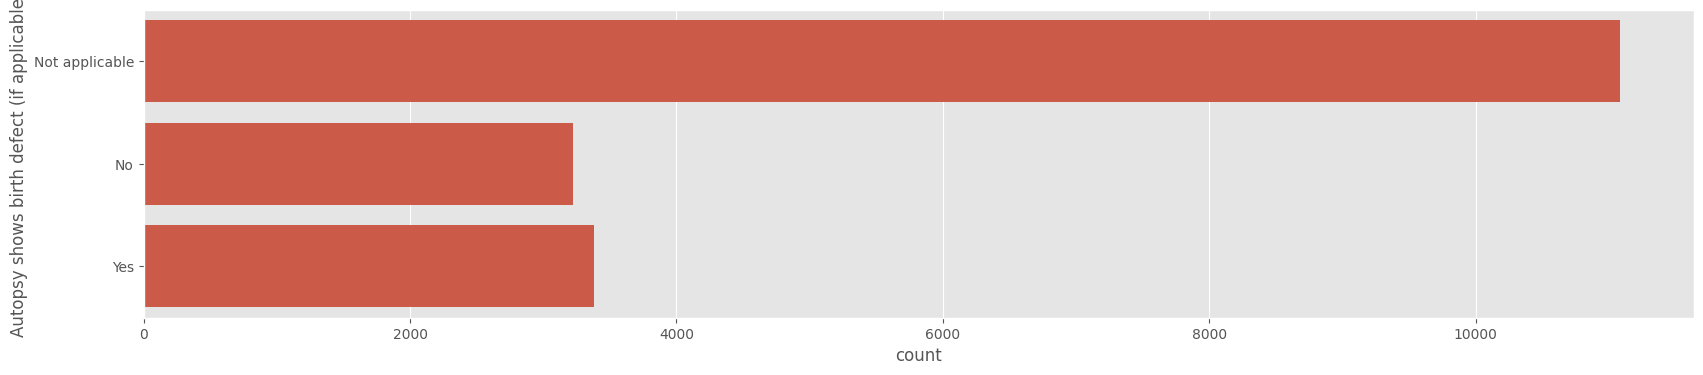

In [ ]:
# Understanding Birth defect distribution
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Autopsy shows birth defect (if applicable)",data= train)

print(train["Autopsy shows birth defect (if applicable)"].value_counts())

In [ ]:
## Checking the Status of Patients with Missing Autopsy Reports
X = train[train["Autopsy shows birth defect (if applicable)"].isnull() == True]
X['Status'].value_counts()

,count
Status,
Deceased,4392


In [ ]:
## Unique Categories
train["Folic acid details (peri-conceptional)"].unique()

array(['No', 'Yes', nan], dtype=object)

Folic acid details (peri-conceptional)
Yes    10087
No      9879
Name: count, dtype: int64


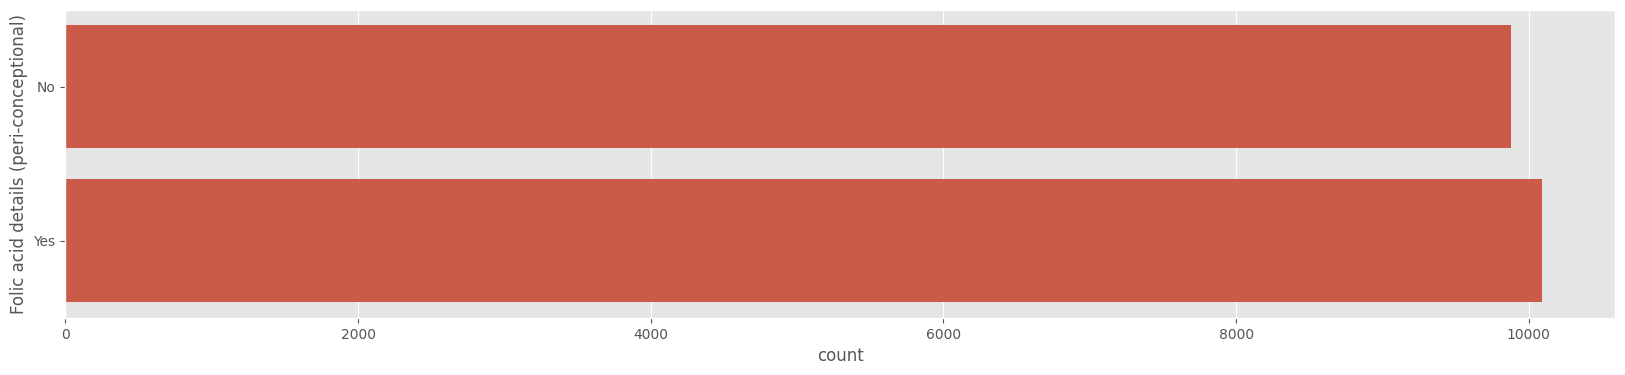

In [ ]:
# Understanding Folic acid details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Folic acid details (peri-conceptional)",data= train)

print(train["Folic acid details (peri-conceptional)"].value_counts())

In [ ]:
## Unique Categories
train["H/O radiation exposure (x-ray)"].unique()

array(['No', 'Not applicable', 'Yes', '-', nan], dtype=object)

H/O radiation exposure (x-ray)
Not applicable    5029
No                5005
Yes               4980
-                 4916
Name: count, dtype: int64


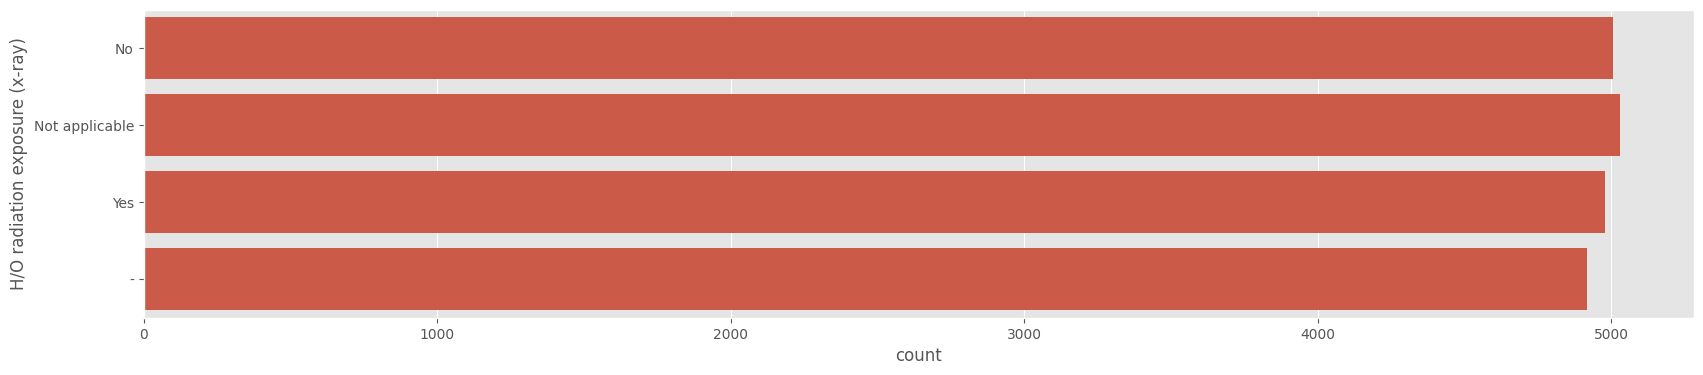

In [ ]:
# Understanding Radiation Exposure details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "H/O radiation exposure (x-ray)",data= train)

print(train["H/O radiation exposure (x-ray)"].value_counts())

In [ ]:
## Unique Categories
train["H/O substance abuse"].unique()

array(['No', 'Not applicable', nan, '-', 'Yes'], dtype=object)

H/O substance abuse
-                 5042
No                5033
Yes               4975
Not applicable    4838
Name: count, dtype: int64


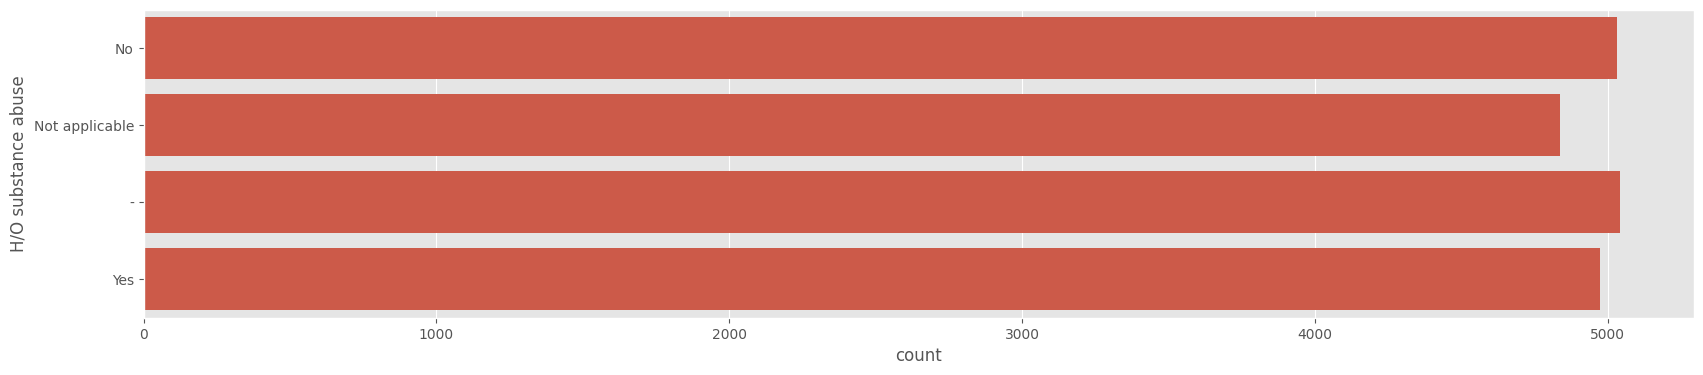

In [ ]:
# Understanding Substance Abuse details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "H/O substance abuse",data= train)

print(train["H/O substance abuse"].value_counts())

In [ ]:
## Unique Categories
train["Assisted conception IVF/ART"].unique()

array(['No', 'Yes', nan], dtype=object)

Assisted conception IVF/ART
Yes    10012
No      9949
Name: count, dtype: int64


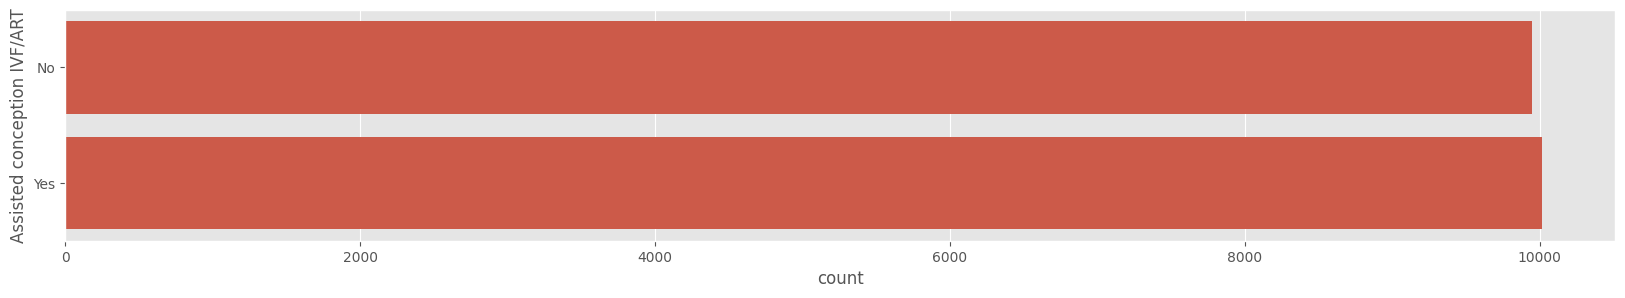

In [ ]:
# Understanding Assisted Conception details
fig = plt.figure(figsize=(20,3))
sns.countplot(y= "Assisted conception IVF/ART",data= train)

print(train["Assisted conception IVF/ART"].value_counts())

In [ ]:
## Unique Categories
train["History of anomalies in previous pregnancies"].unique()

array(['Yes', 'No', nan], dtype=object)

History of anomalies in previous pregnancies
Yes    10082
No      9829
Name: count, dtype: int64


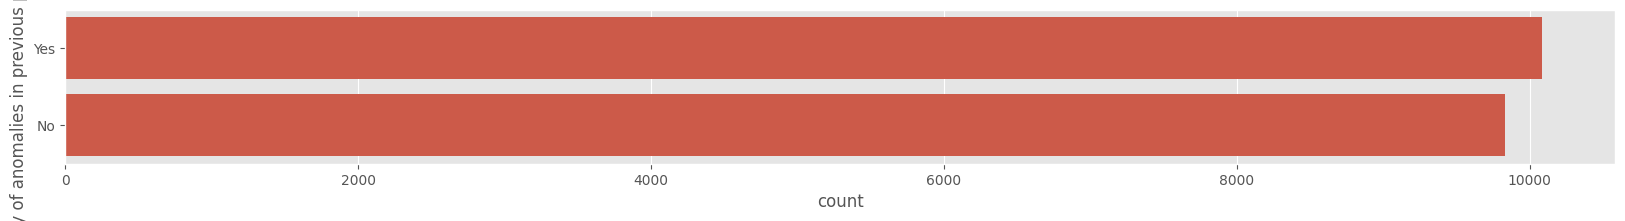

In [ ]:
# Understanding Anomalies in Previous Pregnancies details
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "History of anomalies in previous pregnancies",data= train)

print(train["History of anomalies in previous pregnancies"].value_counts())

In [ ]:
## Unique Categories
train["No. of previous abortion"].unique()

array([nan,  4.,  1.,  0.,  3.,  2.])

No. of previous abortion
2.0    4117
4.0    4005
0.0    3964
1.0    3928
3.0    3907
Name: count, dtype: int64


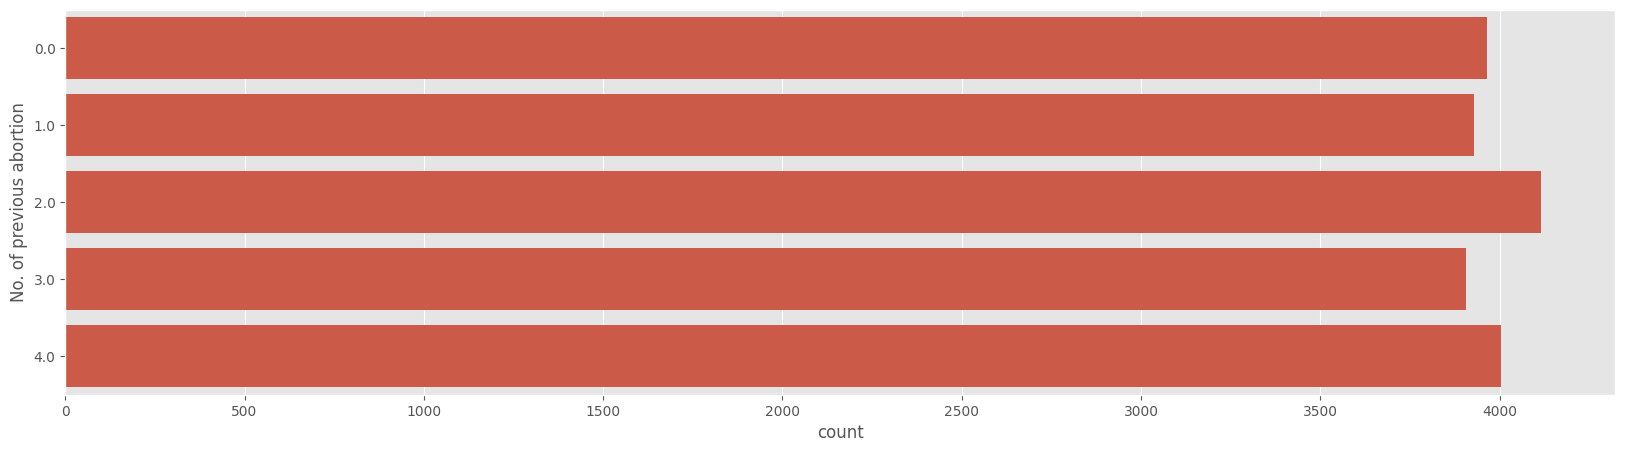

In [ ]:
# Understanding Abortion details
fig = plt.figure(figsize=(20,5))
sns.countplot(y= "No. of previous abortion",data= train)

print(train["No. of previous abortion"].value_counts())

In [ ]:
## Unique Categories
train["Birth defects"].unique()

array([nan, 'Multiple', 'Singular'], dtype=object)

Birth defects
Singular    9977
Multiple    9952
Name: count, dtype: int64


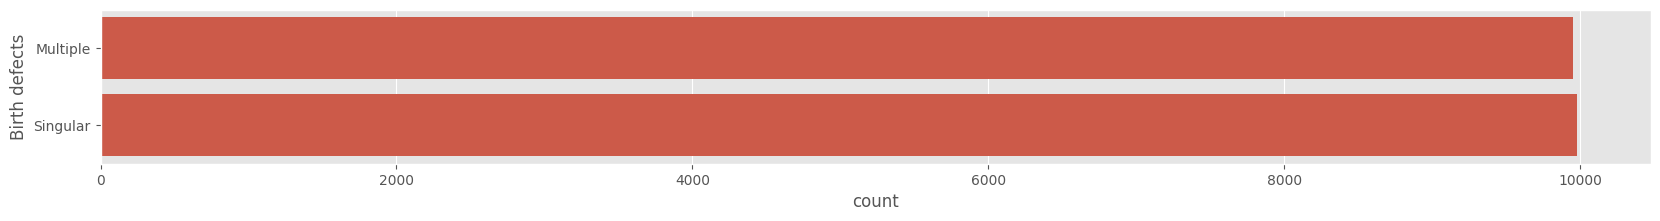

In [ ]:
# Understanding Birth Defects details
fig = plt.figure(figsize=(20,2))
sns.countplot(y= "Birth defects",data= train)

print(train["Birth defects"].value_counts())

In [ ]:
## Missing Values
train["White Blood cell count (thousand per microliter)"].isnull().any()

True

In [ ]:
## Basic Statistics
train['White Blood cell count (thousand per microliter)'].describe()

,White Blood cell count (thousand per microliter)
count,19935.000000
mean,7.486224
std,2.653393
min,3.000000
25%,5.424703
50%,7.477132
75%,9.526152
max,12.000000


In [ ]:
## Unique Categories
train["Blood test result"].unique()

array([nan, 'normal', 'inconclusive', 'slightly abnormal', 'abnormal'],
      dtype=object)

Blood test result
slightly abnormal    5128
normal               4954
inconclusive         4952
abnormal             4904
Name: count, dtype: int64


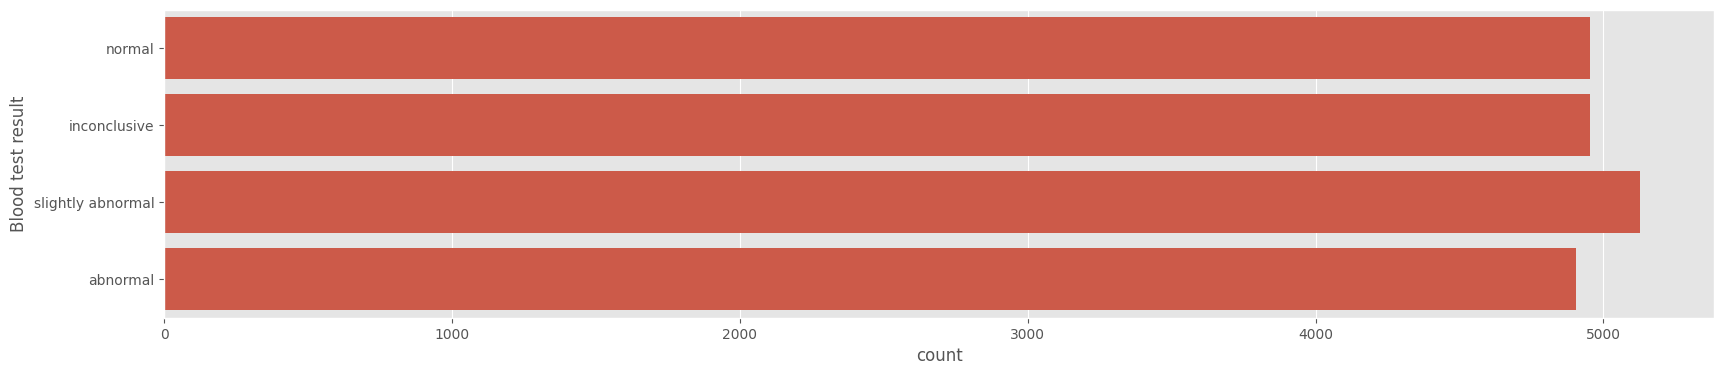

In [ ]:
# Understanding Blood Test Result details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Blood test result",data= train)

print(train["Blood test result"].value_counts())

In [ ]:
print(f"Uniqueness for Symptom 1 is: {train['Symptom 1'].unique()}")
print()
print(f"Uniqueness for Symptom 2 is: {train['Symptom 2'].unique()}")
print()
print(f"Uniqueness for Symptom 3 is: {train['Symptom 3'].unique()}")
print()
print(f"Uniqueness for Symptom 4 is: {train['Symptom 4'].unique()}")
print()
print(f"Uniqueness for Symptom 5 is: {train['Symptom 5'].unique()}")

Uniqueness for Symptom 1 is: [ 1.  0. nan]

Uniqueness for Symptom 2 is: [ 1. nan  0.]

Uniqueness for Symptom 3 is: [ 1.  0. nan]

Uniqueness for Symptom 4 is: [ 1.  0. nan]

Uniqueness for Symptom 5 is: [ 1.  0. nan]


In [ ]:
print(f"Count for Symptom 1 is: {train['Symptom 1'].value_counts()}")
print()
print(f"Count for Symptom 2 is: {train['Symptom 2'].value_counts()}")
print()
print(f"Count for Symptom 3 is: {train['Symptom 3'].value_counts()}")
print()
print(f"Count for Symptom 4 is: {train['Symptom 4'].value_counts()}")
print()
print(f"Count for Symptom 5 is: {train['Symptom 5'].value_counts()}")

Count for Symptom 1 is: Symptom 1
1.0    11807
0.0     8121
Name: count, dtype: int64

Count for Symptom 2 is: Symptom 2
1.0    10961
0.0     8900
Name: count, dtype: int64

Count for Symptom 3 is: Symptom 3
1.0    10715
0.0     9267
Name: count, dtype: int64

Count for Symptom 4 is: Symptom 4
0.0    10030
1.0     9940
Name: count, dtype: int64

Count for Symptom 5 is: Symptom 5
0.0    10724
1.0     9206
Name: count, dtype: int64


In [ ]:
## Unique Categories
train["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

Genetic Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64


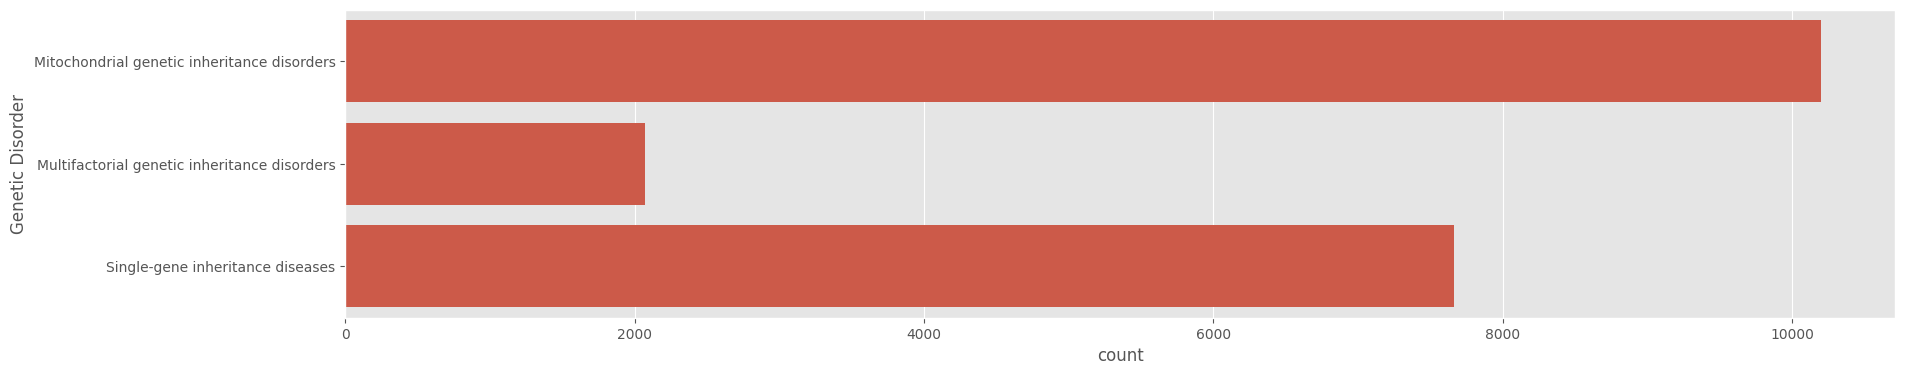

In [ ]:
# Understanding Genetic Disorder details
fig = plt.figure(figsize=(20,4))
sns.countplot(y= "Genetic Disorder",data= train)

print(train["Genetic Disorder"].value_counts())

In [ ]:
## Unique Categories
train["Disorder Subclass"].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's"],
      dtype=object)

Disorder Subclass
Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: count, dtype: int64


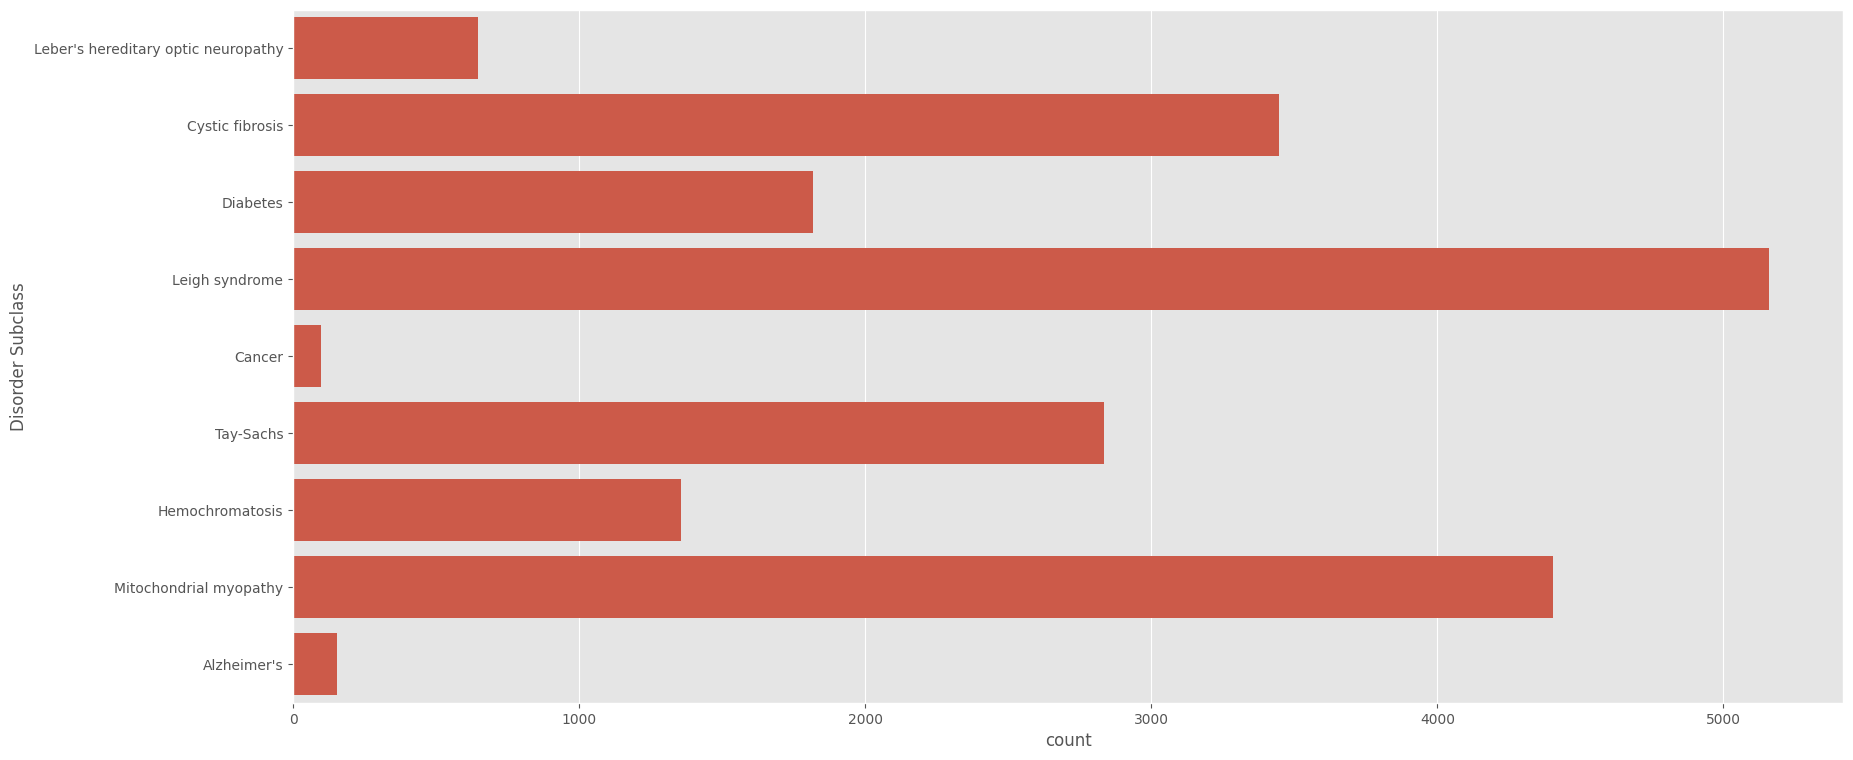

In [ ]:
# Understanding Disorder Subclass details
fig = plt.figure(figsize=(20,9))
sns.countplot(y= "Disorder Subclass",data= train)

print(train["Disorder Subclass"].value_counts())